# Introducción

En este ejercicio implementamos modelos de clasificación multiclase para predecir el estilo de cerveza a partir de sus características fisicoquímicas, específicamente el color (SRM) y el nivel de amargor (IBU). El objetivo es identificar qué tipo de cerveza corresponde a una combinación determinada de valores, utilizando diferentes estrategias de clasificación.

Se entrenaron tres enfoques con la biblioteca Scikit-learn:
1. One-vs-Rest (OVR): donde cada clase se compara contra todas las demás.
2. One-vs-One (OVO): donde se entrena un clasificador para cada par de clases.
3. Softmax (multinomial): donde se generaliza la regresión logística para manejar directamente múltiples clases.

A lo largo del experimento, se analizaron las matrices de confusión y métricas de precisión para cada modelo, con el fin de evaluar su rendimiento y capacidad de generalización sobre los diferentes estilos de cerveza.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# --- Cargar dataset ---
df = pd.read_csv("./Datasets/dataset_cerveza.csv")

X = df[["SRM", "IBU"]]  # características
y = df["CLASE"]         # etiquetas numéricas

mapa_clases = {
    1: "Blanca",
    2: "Lager",
    3: "Pilsner",
    4: "IPA",
    5: "Fuerte",
    6: "Vino de cebada",
    7: "Portero",
    8: "Cerveza fuerte belga"
}

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
# --- Modelo base: Logistic Regression ---
base_model = LogisticRegression(max_iter=1000)

=== Resultados OVR (One-vs-Rest) ===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       1.00      1.00      1.00        15
                 IPA       0.92      0.73      0.81        15
              Fuerte       1.00      0.93      0.97        15
      Vino de cebada       0.78      0.93      0.85        15
             Portero       0.94      1.00      0.97        15
Cerveza fuerte belga       0.93      0.93      0.93        15

            accuracy                           0.94       120
           macro avg       0.95      0.94      0.94       120
        weighted avg       0.95      0.94      0.94       120

=== Resultados OVR (One-vs-Rest) train===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.97      0.

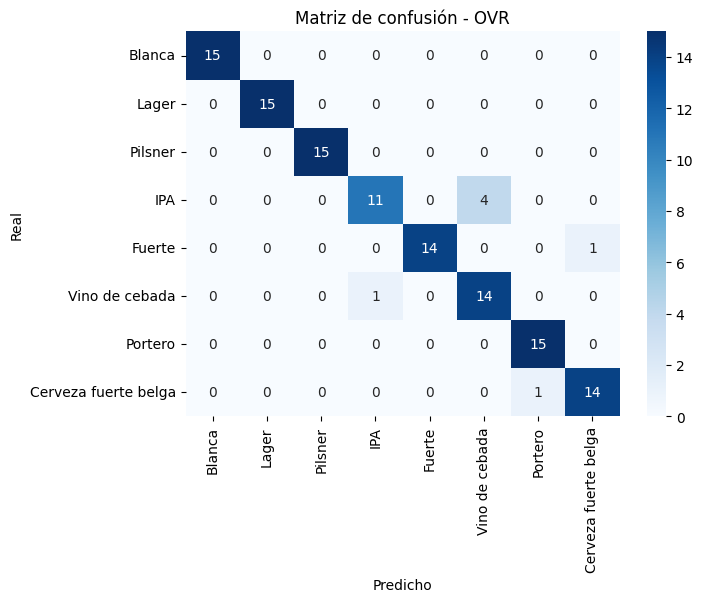

In [5]:
# ---------------------------
# 1) One-vs-Rest (OVR)
# ---------------------------
ovr_clf = OneVsRestClassifier(base_model)
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
y_pred_ovr_train = ovr_clf.predict(X_train)


print("=== Resultados OVR (One-vs-Rest) ===")
print(classification_report(y_test, y_pred_ovr, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))


print("=== Resultados OVR (One-vs-Rest) train===")
print(classification_report(y_train, y_pred_ovr_train, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

cm_ovr = confusion_matrix(y_test, y_pred_ovr)
plt.figure(figsize=(7,5))
sns.heatmap(cm_ovr, annot=True, fmt="d", cmap="Blues",
            xticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())],
            yticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())])
plt.title("Matriz de confusión - OVR")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

=== Resultados OVO (One-vs-One) ===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       1.00      1.00      1.00        15
                 IPA       0.85      0.73      0.79        15
              Fuerte       1.00      0.80      0.89        15
      Vino de cebada       0.76      0.87      0.81        15
             Portero       0.88      1.00      0.94        15
Cerveza fuerte belga       0.81      0.87      0.84        15

            accuracy                           0.91       120
           macro avg       0.91      0.91      0.91       120
        weighted avg       0.91      0.91      0.91       120


=== Resultados OVO (One-vs-One) train ===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.97      0.

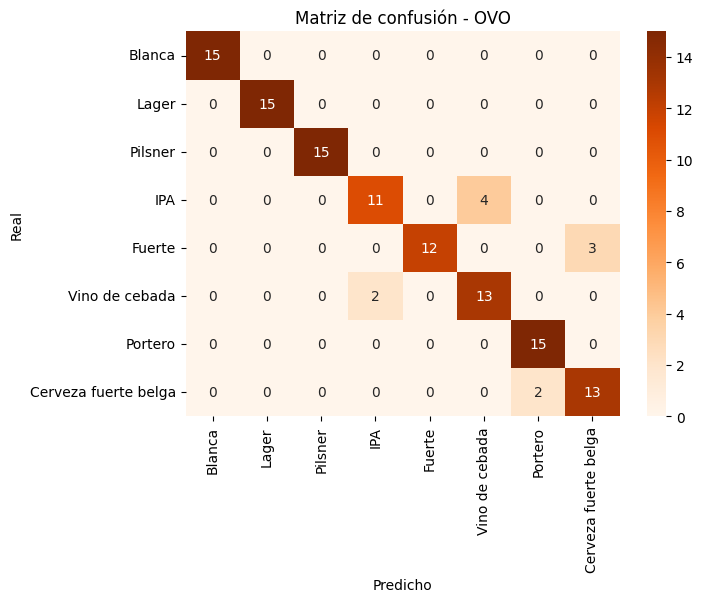

In [6]:
# ---------------------------
# 2) One-vs-One (OVO)
# ---------------------------
ovo_clf = OneVsOneClassifier(base_model)
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
y_pred_ovo_train = ovo_clf.predict(X_train)

print("=== Resultados OVO (One-vs-One) ===")
print(classification_report(y_test, y_pred_ovo, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

print("\n=== Resultados OVO (One-vs-One) train ===")
print(classification_report(y_train, y_pred_ovo_train, target_names=[mapa_clases[c] for c in sorted(mapa_clases.keys())]))

cm_ovo = confusion_matrix(y_test, y_pred_ovo)
plt.figure(figsize=(7,5))
sns.heatmap(cm_ovo, annot=True, fmt="d", cmap="Oranges",
            xticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())],
            yticklabels=[mapa_clases[c] for c in sorted(mapa_clases.keys())])
plt.title("Matriz de confusión - OVO")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

=== Resultados Softmax (multinomial) ===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        15
               Lager       1.00      1.00      1.00        15
             Pilsner       0.94      1.00      0.97        15
                 IPA       0.83      0.67      0.74        15
              Fuerte       1.00      0.87      0.93        15
      Vino de cebada       0.76      0.87      0.81        15
             Portero       0.94      1.00      0.97        15
Cerveza fuerte belga       0.88      0.93      0.90        15

            accuracy                           0.92       120
           macro avg       0.92      0.92      0.92       120
        weighted avg       0.92      0.92      0.92       120


=== Resultados Softmax (multinomial) train ===
                      precision    recall  f1-score   support

              Blanca       1.00      1.00      1.00        35
               Lager       0.97      0.

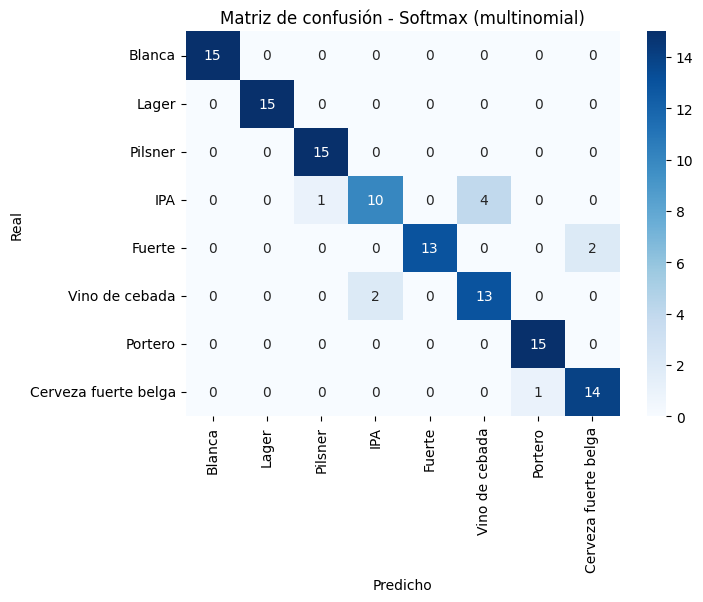

In [7]:
# --- Softmax ---

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo con softmax (aumentando iteraciones y removiendo multi_class)
clf = LogisticRegression(solver="lbfgs", max_iter=2000)
clf.fit(X_train_scaled, y_train)

# Predicciones para test y train usando datos escalados
y_pred = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

# Reporte de métricas para test
print("=== Resultados Softmax (multinomial) ===")
print(classification_report(y_test, y_pred, target_names=mapa_clases.values()))

# Reporte de métricas para train
print("\n=== Resultados Softmax (multinomial) train ===")
print(classification_report(y_train, y_pred_train, target_names=mapa_clases.values()))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=mapa_clases.values(), 
            yticklabels=mapa_clases.values())
plt.title("Matriz de confusión - Softmax (multinomial)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Conclusión

Los resultados obtenidos muestran que los tres enfoques de clasificación lograron un desempeño alto, con precisiones cercanas al 90–94% tanto en entrenamiento como en prueba.
En particular:

- El método One-vs-Rest presentó una precisión del 94%.
- El enfoque One-vs-One obtuvo un rendimiento similar 91%.
- El modelo Softmax multinomial alcanzó una precisión del 92%.

Las matrices de confusión evidenciaron una correcta separación entre estilos con características bien diferenciadas (por ejemplo, IPA o Lager), y algunas confusiones en estilos con valores similares de SRM e IBU.

En conclusión, el ejercicio demuestra la efectividad de los clasificadores logísticos para tareas multiclase, así como la importancia de elegir la estrategia adecuada (OVR, OVO o Softmax) según la naturaleza del problema y la cantidad de clases involucradas